In [ ]:
import pandas as pd
import numpy as np
from itertools import product

In [ ]:
def cross_Entropy(yhat,y):
  """
    Returns the binary cross entropy loss using actual and predicted value
  """
  if y==1:
    return -1*np.log(yhat)
  else:
    return -1*np.log(1-yhat)

def sigmoid(z):
  """
    Returns the computed sigmoid function value
  """
  return 1/(1+np.exp(-z))

def derivative_Cross_Entropy(y,yhat):
  """
    Returns the derivative of cross entropy loss
  """
  return -y*(1/yhat) + (1-y)*(1/(1-yhat))

def derivative_Sigmoid(z):
  """
    Returns the derivative of sigmoid function
  """
  return z*(1-z)


In [ ]:
def train_predict(X,n):
  """
    Returns the bool for linear seperability with threshold of 0.5 on sigmoid score.
  """

  # Weight initialization
  lower = -np.sqrt(6)
  upper = np.sqrt(6)
  W= [np.random.uniform(lower,upper) for k in range(n)]
  bias = np.random.uniform(lower,upper)

  # Shuffling the rows of the dataset
  np.random.shuffle(X)

  y=X[:,-1]
  X=X[:,:-1]


  # Training using gradient descent on binary cross entropy loss function
  iterations = 150 # epochs
  lr = 0.3 # learning rate
  for i in range(iterations):
      predictions =[]
      for j in range(X.shape[0]):
          # Computing the dot product between weights and input features, and adding bias
          z=np.dot(W,X[j,:])+bias
          # Sigmoid score between 0 and 1
          yhat=sigmoid(z)
          predictions.append(yhat)

          # Computing change in paratmeters and bias with derivative
          de_dw = derivative_Cross_Entropy(y[j],yhat)*derivative_Sigmoid(yhat)*X[j,:]
          de_db = derivative_Cross_Entropy(y[j],yhat)*derivative_Sigmoid(yhat)
          # Updating weight and bias
          W = W-lr*de_dw
          bias = bias - lr*de_db

      avg_change = (np.sum(de_dw)+de_db)/(de_dw.shape[0]+1)

      # Stopping training process if average change in parameters become very small
      if (np.abs(lr*(avg_change))<1e-8):
              break

  predicted_labels=[]
  # Thresholding
  for p in predictions:
      if p >=0.5:
          predicted_labels.append(1)
      else:
          predicted_labels.append(0)
  # counting bit differences for misclassification
  misclassifications= sum(predicted_labels ^ y)

  print("Number of misclassifications:", misclassifications)

  # If no misclassifications, return 1 else 0
  if misclassifications==0:
      return 1
  return 0

In [ ]:
def run(n):
  l_sep = 0 # number of linearly seperable solutions

  print('Running Single layer Perceptron on all possible boolean functions for n =', n)
  inputs = list(product([0, 1], repeat=n))

  count=1
  for output in product([0, 1], repeat=len(inputs)):
      X = []
      for row, result in zip(inputs, output):
          X.append(list(row) + [result])

      X=np.array(X)
      l_sep+=train_predict(X,n)

      print("Progress:", count*100/(2**2**n))
      count+=1

  print("Number of linearly seperable function for n =",n ,": ",l_sep)

In [ ]:
n=2 # number of variables
run(n)

Running Single layer Perceptron on all possible boolean functions for n = 2
Number of misclassifications: 0
Progress: 6.25
Number of misclassifications: 0
Progress: 12.5
Number of misclassifications: 0
Progress: 18.75
Number of misclassifications: 0
Progress: 25.0
Number of misclassifications: 0
Progress: 31.25
Number of misclassifications: 0
Progress: 37.5
Number of misclassifications: 4
Progress: 43.75
Number of misclassifications: 0
Progress: 50.0
Number of misclassifications: 0
Progress: 56.25
Number of misclassifications: 4
Progress: 62.5
Number of misclassifications: 0
Progress: 68.75
Number of misclassifications: 0
Progress: 75.0
Number of misclassifications: 0
Progress: 81.25
Number of misclassifications: 0
Progress: 87.5
Number of misclassifications: 0
Progress: 93.75
Number of misclassifications: 0
Progress: 100.0
Number of linearly seperable function for n = 2 :  14


In [ ]:
n = 3 # number of variables
run(n)

Running Single layer Perceptron on all possible boolean functions for n = 3
Number of misclassifications: 0
Progress: 0.390625
Number of misclassifications: 0
Progress: 0.78125
Number of misclassifications: 0
Progress: 1.171875
Number of misclassifications: 0
Progress: 1.5625
Number of misclassifications: 0
Progress: 1.953125
Number of misclassifications: 0
Progress: 2.34375
Number of misclassifications: 4
Progress: 2.734375
Number of misclassifications: 0
Progress: 3.125
Number of misclassifications: 0
Progress: 3.515625
Number of misclassifications: 4
Progress: 3.90625
Number of misclassifications: 0
Progress: 4.296875
Number of misclassifications: 0
Progress: 4.6875
Number of misclassifications: 0
Progress: 5.078125
Number of misclassifications: 0
Progress: 5.46875
Number of misclassifications: 0
Progress: 5.859375
Number of misclassifications: 0
Progress: 6.25
Number of misclassifications: 0
Progress: 6.640625
Number of misclassifications: 0
Progress: 7.03125
Number of misclassific

In [ ]:
n = 4 # number of variables
run(n)

Streaming output truncated to the last 5000 lines.
Progress: 96.18682861328125
Number of misclassifications: 6
Progress: 96.1883544921875
Number of misclassifications: 7
Progress: 96.18988037109375
Number of misclassifications: 4
Progress: 96.19140625
Number of misclassifications: 4
Progress: 96.19293212890625
Number of misclassifications: 5
Progress: 96.1944580078125
Number of misclassifications: 6
Progress: 96.19598388671875
Number of misclassifications: 6
Progress: 96.197509765625
Number of misclassifications: 4
Progress: 96.19903564453125
Number of misclassifications: 7
Progress: 96.2005615234375
Number of misclassifications: 5
Progress: 96.20208740234375
Number of misclassifications: 4
Progress: 96.20361328125
Number of misclassifications: 5
Progress: 96.20513916015625
Number of misclassifications: 5
Progress: 96.2066650390625
Number of misclassifications: 7
Progress: 96.20819091796875
Number of misclassifications: 8
Progress: 96.209716796875
Number of misclassifications: 6
Progre

In [ ]:
n = 5 # number of variables
run(n)

Streaming output truncated to the last 5000 lines.
Number of misclassifications: 8
Progress: 0.004222290590405464
Number of misclassifications: 9
Progress: 0.0042223138734698296
Number of misclassifications: 9
Progress: 0.004222337156534195
Number of misclassifications: 5
Progress: 0.00422236043959856
Number of misclassifications: 8
Progress: 0.004222383722662926
Number of misclassifications: 9
Progress: 0.004222407005727291
Number of misclassifications: 6
Progress: 0.0042224302887916565
Number of misclassifications: 7
Progress: 0.004222453571856022
Number of misclassifications: 8
Progress: 0.004222476854920387
Number of misclassifications: 8
Progress: 0.004222500137984753
Number of misclassifications: 9
Progress: 0.004222523421049118
Number of misclassifications: 6
Progress: 0.004222546704113483
Number of misclassifications: 8
Progress: 0.004222569987177849
Number of misclassifications: 7
Progress: 0.004222593270242214
Number of misclassifications: 6
Progress: 0.00422261655330658
Numb

Running all boolean functions for n = {2,3,4,5},

Following values are obtained-

n=2 , f(n) = 14

n=3 , f(n) = 104

n=4 , f(n) = 1882  (*Approx 30-40 mins execution time*)

n=5 , f(n) = 94572

# Relationship between number of linearly seperable functions and number of boolean variables

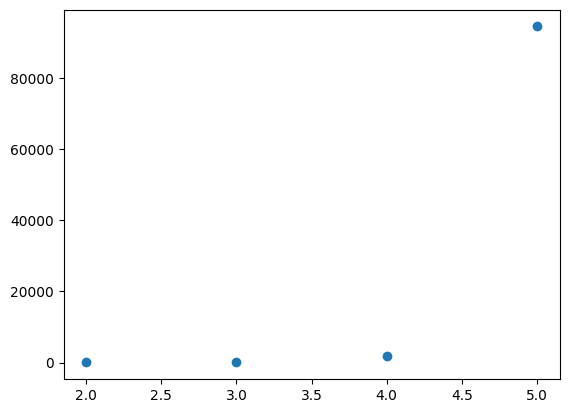

In [ ]:
# Plotting scatter plot of points
import matplotlib.pyplot as plt

x = np.array([2,3,4,5]).reshape(-1,1)
y = np.array([14,104,1882,94572])
plt.scatter(x, y)
plt.show()

## Modelling linear relationship

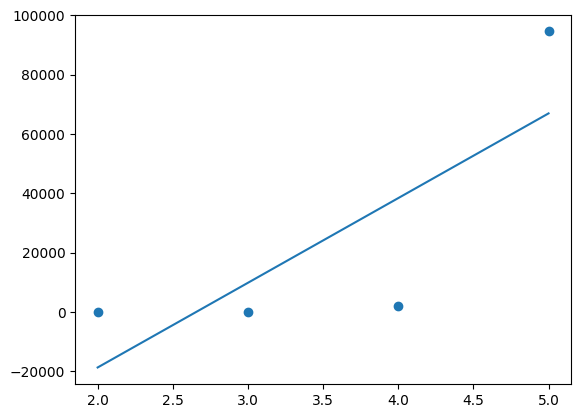

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

regressor = LinearRegression()
regressor.fit(x, y)
y1 = regressor.coef_*x + regressor.intercept_
plt.scatter(x, y)
plt.plot(x,y1)
plt.show()

## Modelling Exponential relationship

In [ ]:
x = np.array([2,3,4,5])
y = np.array([14,104,1882,94572])

In [ ]:
coefficients = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
coefficients

array([ 3.77719433, -7.4304169 ])

In [ ]:
yh = np.exp(coefficients[0]*x +coefficients[1])

*ln*(y)  = 3.77719433* x -7.4304169

Taking power of e on both sides-

y = e^(3.77719433*x-7.4304169)



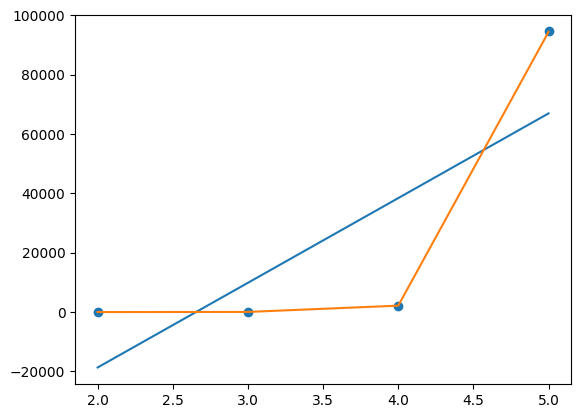

In [ ]:
plt.scatter(x, y)
# plt.plot(x,y1)
plt.plot(x,yh)
plt.show()


For the given sample of 4 points, exponentials seems the best approximation to describe relationship between number of variables and linearly seperable functions.